Revenue Prediction
==================
In this project the goal is to predict movies revenue using their features. revenue is given by ( box_office - budget ) so the main goal is to predict box office. 

1. Prepare and preprocess the given data. 

2. After exploring data find, select and especially create new features. ignore others.

3. Prepare features to feed the model. 

4. Select and try different models.

5. Document and report each step using relative plots and a brief explanation. finally report the best suited model and justify why did it performed well.



- Keep in mind that in this task accuracy itself only has only part of score.

- Hint: to create new features you can use credit attributes. Think of it this way, what affects box office?  

**Tools** 

importing useful tools and libraries. you may use any other library as well.

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [242]:
np.random.seed(101)

In [ ]:
# Your project struct must look like this,


# |‚îÄ‚îÄ Name_SID.zip
# ‚îÇ   ‚îú‚îÄ‚îÄ data
# ‚îÇ   ‚îÇ       ‚îú‚îÄ‚îÄ rotten_tomatoes_5000_movies.csv
# ‚îÇ   ‚îÇ       ‚îú‚îÄ‚îÄ rotten_tomatoes_5000_movies.csv
# ‚îÇ   ‚îú‚îÄ‚îÄ *.ipynb
# ‚îÇ   ‚îú‚îÄ‚îÄ document.pdf

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv("rotten_tomatoes_5000_credits.csv")


print("Movies dataset info:")
df_movies.info()

print("\nCredits dataset info:")
df_credit.info()


Movies dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rt_production_budget     4803 non-null   int64  
 1   rt_genres                4803 non-null   object 
 2   rt_website               1712 non-null   object 
 3   rt_movie_id              4803 non-null   int64  
 4   rt_keywords              4803 non-null   object 
 5   rt_original_language     4803 non-null   object 
 6   rt_original_title        4803 non-null   object 
 7   rt_synopsis              4800 non-null   object 
 8   rt_audience_score        4803 non-null   float64
 9   rt_studios               4803 non-null   object 
 10  rt_production_countries  4803 non-null   object 
 11  rt_release_date          4802 non-null   object 
 12  rt_box_office            4803 non-null   int64  
 13  rt_runtime               4801 non-null   float64
 14  rt_

In [ ]:
import pandas as pd
import ast


print("ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ŸÇÿ®ŸÑ ÿßÿ≤ Ÿæÿ±ÿØÿßÿ≤ÿ¥:", df_movies.shape[0])


columns_to_drop = ["rt_website", "rt_tagline"]
df_movies.drop(columns=[col for col in columns_to_drop if col in df_movies.columns], inplace=True)


df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')


df_movies["rt_runtime"].fillna(df_movies["rt_runtime"].mean(), inplace=True)
df_movies["rt_synopsis"].fillna("Unknown", inplace=True)


print("\nÿ®ÿ±ÿ±ÿ≥€å ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ rt_genres ŸÇÿ®ŸÑ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:")
print(df_movies["rt_genres"].head())

print("\nÿ®ÿ±ÿ±ÿ≥€å ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ rt_production_countries ŸÇÿ®ŸÑ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:")
print(df_movies["rt_production_countries"].head())


df_movies["rt_genres"] = df_movies["rt_genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])
df_movies["rt_production_countries"] = df_movies["rt_production_countries"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])

print("\nÿ®ÿ±ÿ±ÿ≥€å ÿ≥ÿßÿÆÿ™ÿßÿ± `rt_genres` Ÿæÿ≥ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:")
print(df_movies["rt_genres"].head())

print("\nÿ®ÿ±ÿ±ÿ≥€å ÿ≥ÿßÿÆÿ™ÿßÿ± `rt_production_countries` Ÿæÿ≥ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:")
print(df_movies["rt_production_countries"].head())


print("\nÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß€å€å ⁄©Ÿá ⁄òÿßŸÜÿ± ŸÜÿØÿßÿ±ŸÜÿØ:", df_movies["rt_genres"].apply(len).eq(0).sum())
print("ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß€å€å ⁄©Ÿá ⁄©ÿ¥Ÿàÿ± ŸÜÿØÿßÿ±ŸÜÿØ:", df_movies["rt_production_countries"].apply(len).eq(0).sum())

df_movies = df_movies[df_movies["rt_genres"].apply(lambda x: len(x) > 0)]
df_movies = df_movies[df_movies["rt_production_countries"].apply(lambda x: len(x) > 0)]

print("\nÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ÿ®ÿπÿØ ÿßÿ≤ ŸÅ€åŸÑÿ™ÿ±:", df_movies.shape[0])

df_movies.info()


ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ŸÇÿ®ŸÑ ÿßÿ≤ Ÿæÿ±ÿØÿßÿ≤ÿ¥: 4803

ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ rt_genres ŸÇÿ®ŸÑ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:
0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: rt_genres, dtype: object

ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ rt_production_countries ŸÇÿ®ŸÑ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:
0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "GB", "name": "United Kingdom"...
3    [{"iso_3166_1": "US", "name": "United States o...
4    [{"iso_3166_1": "US", "name": "United States o...
Name: rt_production_countries, dtype: object

ÿ®ÿ±ÿ±ÿ≥€å ÿ≥ÿßÿÆÿ™ÿßÿ± `rt_genres` Ÿæÿ≥ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:
0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2  

In [ ]:

from sklearn.model_selection import train_test_split


df_movies = df_movies[df_movies["rt_box_office"] != 0]


y = df_movies["rt_box_office"]
X = df_movies.drop(columns=["rt_box_office", "rt_movie_id", "rt_title", "rt_original_title"])  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


print(f" Training Data Shape: {X_train.shape}")
print(f" Test Data Shape: {X_test.shape}")


 Training Data Shape: (2515, 14)
 Test Data Shape: (839, 14)


1."ŸÖÿ™Ÿàÿ≥ÿ∑ Ÿáÿ≤€åŸÜŸá ÿ®ÿ±ÿß€å Ÿáÿ± ⁄òÿßŸÜÿ± ŸÅ€åŸÑŸÖ ⁄ÜŸÇÿØÿ± ÿßÿ≥ÿ™ÿü"

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

rt_genres
Animation          6.646590e+07
Adventure          6.632686e+07
Fantasy            6.356061e+07
Science Fiction    5.186555e+07
Action             5.151075e+07
Family             5.071951e+07
War                3.528246e+07
Thriller           3.196821e+07
Mystery            3.074449e+07
History            2.990347e+07
Crime              2.784981e+07
Western            2.707870e+07
Comedy             2.531342e+07
Drama              2.067832e+07
Romance            2.031136e+07
Music              1.590795e+07
Horror             1.457403e+07
Documentary        2.653288e+06
TV Movie           1.150000e+06
Foreign            6.580884e+05
Name: rt_production_budget, dtype: float64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

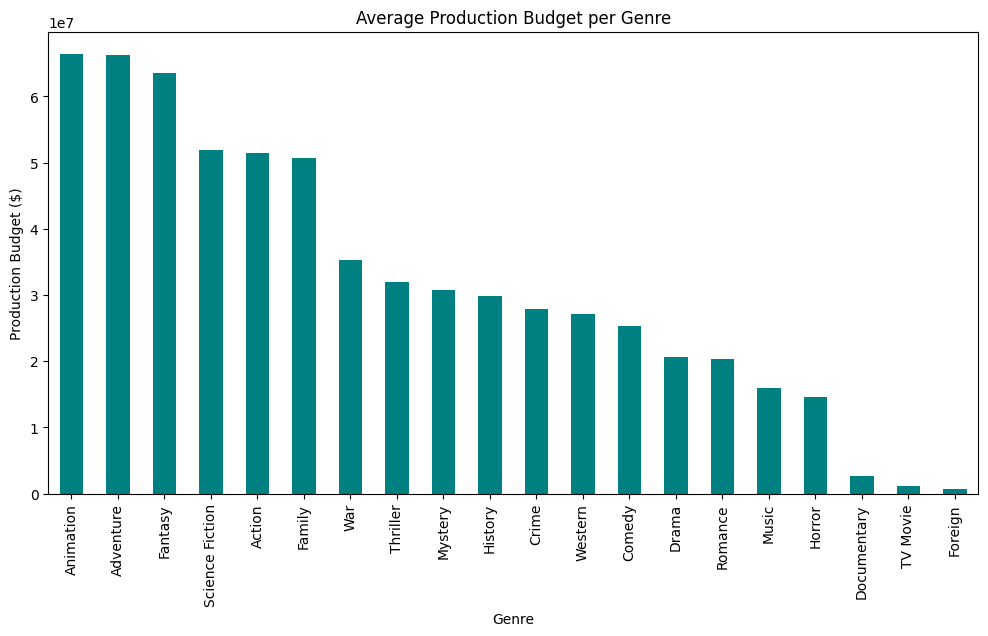

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")


df_movies.drop(columns=["rt_website", "rt_tagline"], inplace=True)
df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"])
df_movies["rt_runtime"].fillna(df_movies["rt_runtime"].mean(), inplace=True)
df_movies["rt_synopsis"].fillna("Unknown", inplace=True)


df_movies["rt_genres"] = df_movies["rt_genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])


df_exploded = df_movies.explode("rt_genres") 

genre_budget = df_exploded.groupby("rt_genres")["rt_production_budget"].mean().sort_values(ascending=False)


print(genre_budget)


plt.figure(figsize=(12, 6))
genre_budget.plot(kind="bar", color="teal")
plt.title("Average Production Budget per Genre")
plt.xlabel("Genre")
plt.ylabel("Production Budget ($)")
plt.show()


ÿ≥ŸàÿßŸÑ2: "ÿ≥ŸáŸÖ Ÿáÿ± ⁄©ÿ¥Ÿàÿ± ÿØÿ± ŸÖÿ¨ŸÖŸàÿπ Ÿáÿ≤€åŸÜŸá Ÿáÿ± ⁄òÿßŸÜÿ± ŸÅ€åŸÑŸÖ ⁄ÜŸÇÿØÿ± ÿßÿ≥ÿ™ÿü (ÿ®ÿ±ÿß€å 5 ÿ™ÿß ÿßÿ≤ Ÿæÿ± ÿÆÿ±ÿ¨‚Äåÿ™ÿ±€åŸÜ ⁄òÿßŸÜÿ±Ÿáÿß)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

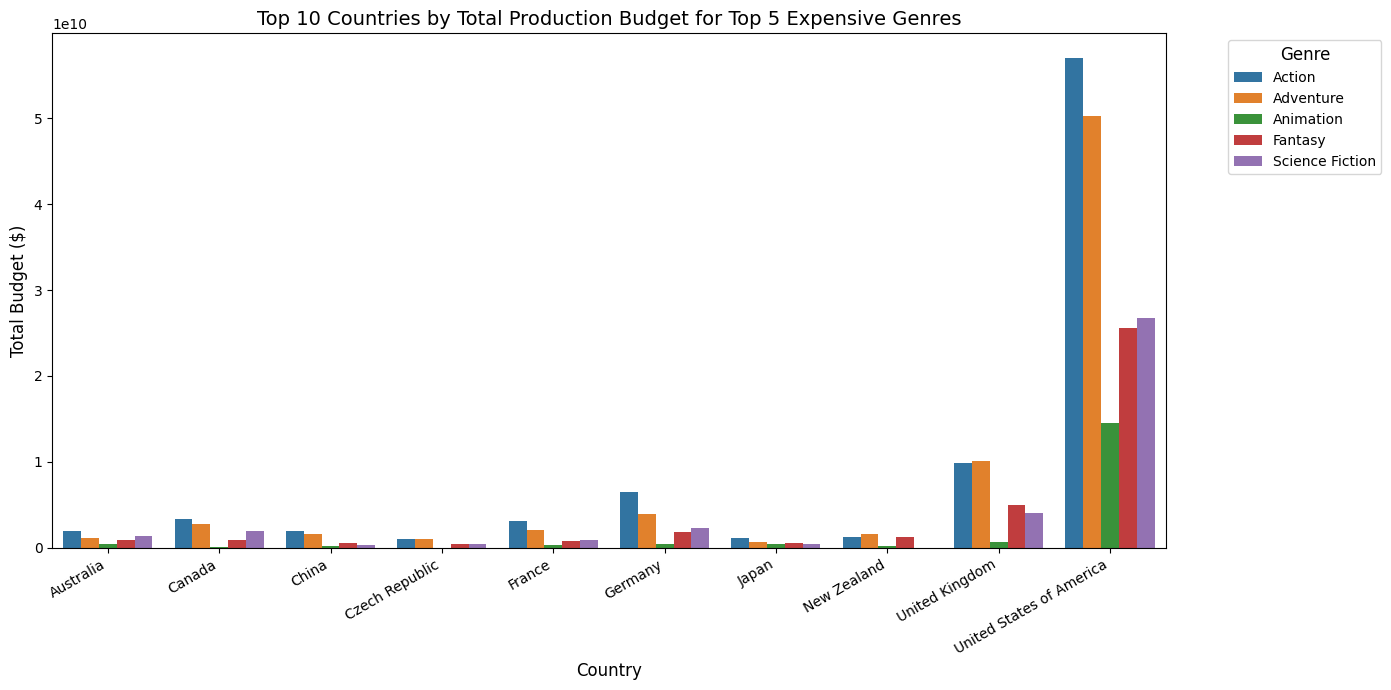

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns


df_movies["rt_production_countries"] = df_movies["rt_production_countries"].apply(
    lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else []
)


df_movies_cleaned = df_movies[df_movies["rt_production_countries"].apply(len) > 0].copy()


df_exploded_genres = df_movies_cleaned.explode("rt_genres")
top_5_genres = df_exploded_genres.groupby("rt_genres")["rt_production_budget"].mean().nlargest(5).index
df_top_5_genres = df_exploded_genres[df_exploded_genres["rt_genres"].isin(top_5_genres)]


df_exploded_countries = df_top_5_genres.explode("rt_production_countries")


country_genre_budget = (
    df_exploded_countries
    .groupby(["rt_production_countries", "rt_genres"])["rt_production_budget"]
    .sum()
    .reset_index()
)


country_genre_budget = country_genre_budget[country_genre_budget["rt_production_budget"] > 0]


top_countries = (
    country_genre_budget.groupby("rt_production_countries")["rt_production_budget"]
    .sum()
    .nlargest(10)
    .index
)
country_genre_budget_filtered = country_genre_budget[country_genre_budget["rt_production_countries"].isin(top_countries)]


plt.figure(figsize=(14, 7))
sns.barplot(
    data=country_genre_budget_filtered,
    x="rt_production_countries",
    y="rt_production_budget",
    hue="rt_genres",
    dodge=True
)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 10 Countries by Total Production Budget for Top 5 Expensive Genres", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Budget ($)", fontsize=12)
plt.legend(title="Genre", fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


ÿ≥ŸàÿßŸÑ 3 : ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß€å ÿ≥ÿßÿÆÿ™Ÿá‚Äåÿ¥ÿØŸá ÿØÿ± 3 ⁄òÿßŸÜÿ± ÿØÿ± 10 ÿ≥ÿßŸÑ ⁄Øÿ∞ÿ¥ÿ™Ÿá ÿ±ÿß ŸÖŸÇÿß€åÿ≥Ÿá ⁄©ŸÜ€åÿØ.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1878649039.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif'

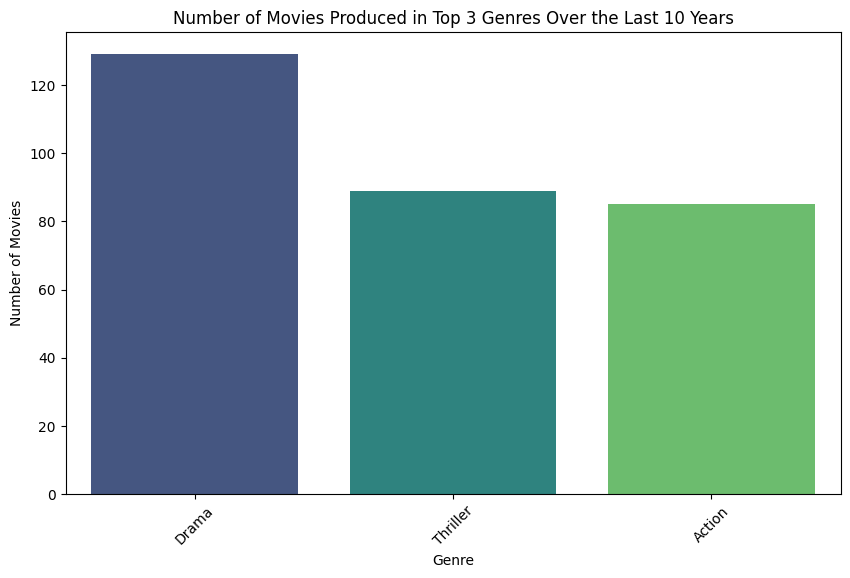

ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ÿØÿ± €±€∞ ÿ≥ÿßŸÑ ÿßÿÆ€åÿ± ÿ®ÿ±ÿß€å Ÿáÿ± ⁄òÿßŸÜÿ±:
rt_genres
Drama       129
Thriller     89
Action       85
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


recent_years = df_movies[df_movies["rt_release_date"] > pd.Timestamp.now() - pd.DateOffset(years=10)]


df_exploded = recent_years.explode("rt_genres")


top_3_genres = df_exploded["rt_genres"].value_counts().head(3).index


filtered_df = df_exploded[df_exploded["rt_genres"].isin(top_3_genres)]


genre_counts = filtered_df["rt_genres"].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Number of Movies Produced in Top 3 Genres Over the Last 10 Years")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


print("ÿ™ÿπÿØÿßÿØ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ÿØÿ± €±€∞ ÿ≥ÿßŸÑ ÿßÿÆ€åÿ± ÿ®ÿ±ÿß€å Ÿáÿ± ⁄òÿßŸÜÿ±:")
print(genre_counts)


ÿ≥ŸàÿßŸÑ 4 ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑ ⁄©ÿØŸàŸÖ ⁄©ÿ¥Ÿàÿ±Ÿáÿß ÿ∑ŸàŸÑÿßŸÜ€å ÿ™ÿ±€åŸÜ ŸÅ€åŸÑŸÖ Ÿáÿß Ÿà ⁄©Ÿàÿ™ÿßŸá ÿ™ÿ±€åŸÜ ŸÅ€åŸÑŸÖ Ÿáÿß ÿ±Ÿà ŸÖ€åÿ≥ÿßÿ≤ŸÜÿØÿü

In [ ]:
import pandas as pd


df_exploded_countries = df_movies.explode("rt_production_countries")


df_exploded_countries = df_exploded_countries[df_exploded_countries["rt_runtime"] > 0]


country_runtime = (
    df_exploded_countries.groupby("rt_production_countries")["rt_runtime"]
    .mean()
    .sort_values(ascending=False)
)


longest_movie_country = country_runtime.idxmax()
shortest_movie_country = country_runtime.idxmin()


print(f"⁄©ÿ¥Ÿàÿ± ÿ®ÿß ÿ∑ŸàŸÑÿßŸÜ€å‚Äåÿ™ÿ±€åŸÜ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß (ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑): {longest_movie_country} ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ {country_runtime.max():.2f} ÿØŸÇ€åŸÇŸá")
print(f"⁄©ÿ¥Ÿàÿ± ÿ®ÿß ⁄©Ÿàÿ™ÿßŸá‚Äåÿ™ÿ±€åŸÜ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß (ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑): {shortest_movie_country} ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ {country_runtime.min():.2f} ÿØŸÇ€åŸÇŸá")


print("\nŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ÿ¥Ÿàÿ±:")
print(country_runtime)


⁄©ÿ¥Ÿàÿ± ÿ®ÿß ÿ∑ŸàŸÑÿßŸÜ€å‚Äåÿ™ÿ±€åŸÜ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß (ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑): Libyan Arab Jamahiriya ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ 173.00 ÿØŸÇ€åŸÇŸá
⁄©ÿ¥Ÿàÿ± ÿ®ÿß ⁄©Ÿàÿ™ÿßŸá‚Äåÿ™ÿ±€åŸÜ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß (ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑): Kenya ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ 60.00 ÿØŸÇ€åŸÇŸá

ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ ŸÅ€åŸÑŸÖ‚ÄåŸáÿß ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ÿ¥Ÿàÿ±:
rt_production_countries
Libyan Arab Jamahiriya    173.0
Dominica                  151.0
Malta                     143.0
Kyrgyz Republic           135.0
Portugal                  133.0
                          ...  
Angola                     85.0
Monaco                     84.0
Afghanistan                83.0
Guadaloupe                 78.0
Kenya                      60.0
Name: rt_runtime, Length: 88, dtype: float64


ÿ≥ŸàÿßŸÑ 5 :ÿ®Ÿá ÿ∫€åÿ± ÿßŸÜ⁄ØŸÑ€åÿ≥€å Ÿæÿ±ÿ™⁄©ÿ±ÿßÿ± ÿ™ÿ±€åŸÜ ÿ≤ÿ®ÿßŸÜ Ÿáÿß ÿØÿ±ŸÅ€åŸÑŸÖ Ÿáÿß ⁄ÜŸá Ÿáÿ≥ÿ™ŸÜÿØÿü

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\692940856.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis")
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif

Most frequent non-English languages in movies:
rt_languages
Fran√ßais     437
Espa√±ol      351
Deutsch      262
Italiano     188
P—É—Å—Å–∫–∏–π      185
ÊôÆÈÄöËØù          107
Êó•Êú¨Ë™û           97
Portugu√™s     68
ÿßŸÑÿπÿ±ÿ®Ÿäÿ©       67
              54
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

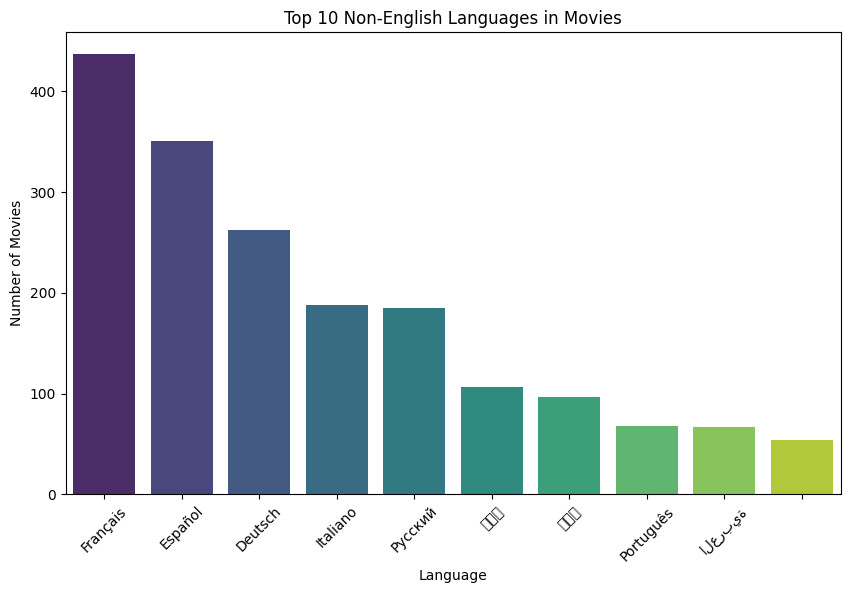

In [ ]:
import ast


df_movies["rt_languages"] = df_movies["rt_languages"].apply(
    lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else []
)


df_exploded_languages = df_movies.explode("rt_languages")


non_english_languages = df_exploded_languages[
    df_exploded_languages["rt_languages"].str.lower() != "english"
]


top_languages = non_english_languages["rt_languages"].value_counts().head(10)


print("Most frequent non-English languages in movies:")
print(top_languages)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis")
plt.title("Top 10 Non-English Languages in Movies")
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


 ÿ≥ŸàÿßŸÑ 6 : ÿ¢ŸÖÿ±€å⁄©ÿß ÿØÿ± 10 ÿ≥ÿßŸÑ ⁄Øÿ∞ÿ¥ÿ™Ÿáÿå ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑ ÿØÿ± Ÿáÿ± ÿ≥ÿßŸÑ ⁄ÜŸÇÿØÿ± ÿØÿ± ÿµŸÜÿπÿ™ ŸÅ€åŸÑŸÖÿ≥ÿßÿ≤€å Ÿáÿ≤€åŸÜŸá ⁄©ÿ±ÿØŸá ÿßÿ≥ÿ™ ÿü(ÿ®Ÿá ÿ™ŸÅ⁄©€å⁄© ÿ≥ÿßŸÑ)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Total yearly production budget in the US (2015-2024):
rt_release_date
2015    6332175004
2016    4631400000
Name: rt_production_budget, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


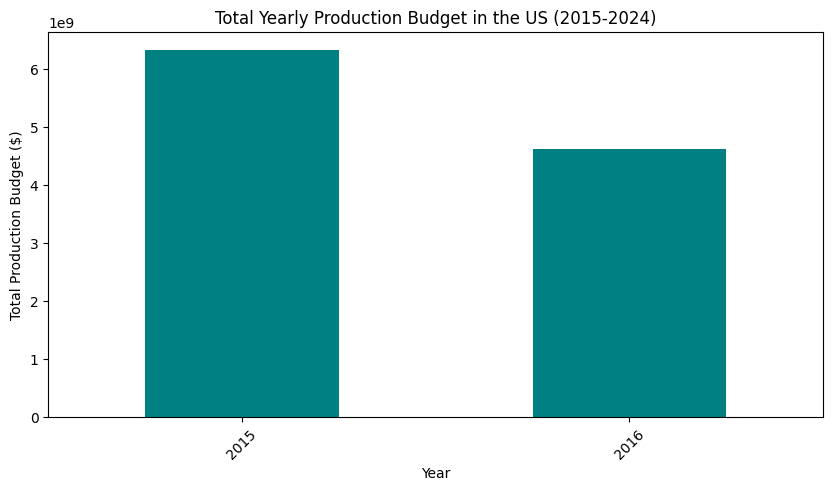

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


us_movies = df_movies[df_movies["rt_production_countries"].apply(lambda x: "United States of America" in x)]


recent_us_movies = us_movies[(us_movies["rt_release_date"].dt.year >= 2015) & 
                             (us_movies["rt_release_date"].dt.year <= 2024)]


yearly_budget = recent_us_movies.groupby(recent_us_movies["rt_release_date"].dt.year)["rt_production_budget"].sum()

print("Total yearly production budget in the US (2015-2024):")
print(yearly_budget)


plt.figure(figsize=(10, 5))
yearly_budget.plot(kind="bar", color="teal")
plt.title("Total Yearly Production Budget in the US (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Total Production Budget ($)")
plt.xticks(rotation=45)
plt.show()


ÿ≥ŸàÿßŸÑ 7 : ÿ±ŸàŸÜÿØ ŸÇÿ®ŸÑ€å ÿ±Ÿà ÿ®ÿØŸàŸÜ ÿØÿ± ŸÜÿ∏ÿ± ⁄Øÿ±ŸÅÿ™ŸÜ ⁄©ÿ¥Ÿàÿ± ÿ®ÿ±ÿß€å 10 ÿ≥ÿßŸÑ ⁄Øÿ∞ÿ¥ÿ™Ÿá ÿØÿ± ŸÜÿ∏ÿ± ÿ®⁄Ø€åÿ±€åÿØ

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Total yearly production budget (2015-2024) for all movies:
rt_release_date
2015    6724547367
2016    4753140000
2017             0
Name: rt_production_budget, dtype: int64


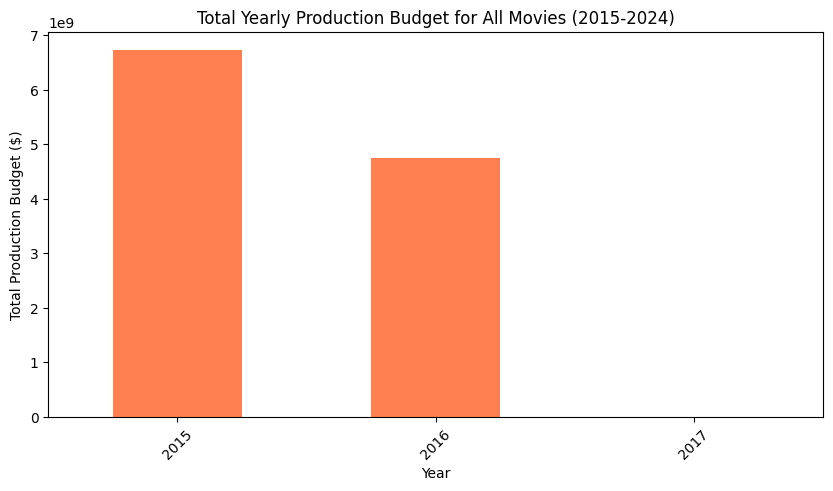

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


recent_movies = df_movies[(df_movies["rt_release_date"].dt.year >= 2015) & 
                          (df_movies["rt_release_date"].dt.year <= 2024)]

yearly_budget_all_countries = recent_movies.groupby(recent_movies["rt_release_date"].dt.year)["rt_production_budget"].sum()


print("Total yearly production budget (2015-2024) for all movies:")
print(yearly_budget_all_countries)


plt.figure(figsize=(10, 5))
yearly_budget_all_countries.plot(kind="bar", color="coral")
plt.title("Total Yearly Production Budget for All Movies (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Total Production Budget ($)")
plt.xticks(rotation=45)
plt.show()


ÿ≥ŸàÿßŸÑ 8 : ÿ¨ÿßŸÜ€å ÿØŸæ ÿØÿ± ⁄ÜŸá ŸÅ€åŸÑŸÖ Ÿáÿß€å€å ÿ®ÿßÿ≤€å ⁄©ÿ±ÿØŸá ÿßÿ≥ÿ™ ÿü

In [ ]:

johnny_depp_movies = df_credit[df_credit["rt_actors"].str.contains("Johnny Depp", na=False)]


johnny_depp_table = johnny_depp_movies[["rt_title", "rt_movie_id"]].rename(columns={"rt_title": "rt_title_movies"})



johnny_depp_table.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'black'), ('color', 'white')]}]
).set_properties(**{'text-align': 'center'})


ÿ≥ŸàÿßŸÑ 9 : ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ™Ÿàÿ≥ÿ∑ ⁄ÜŸÜÿØ ÿØÿ±ÿµÿØ ŸÜŸÇÿ¥ ÿßŸàŸÑ ÿ™ÿß ŸæŸÜÿ¨ŸÖ ŸÅ€åŸÑŸÖ Ÿáÿß (ÿ®Ÿá ÿ™ŸÅ⁄©€å⁄© ÿ®ÿ±ÿß€å Ÿáÿ± ŸÜŸÇÿ¥)ŸÖÿ±ÿØÿåŸà ⁄ÜŸÜÿØ ÿØÿ±ÿµÿØ ÿ≤ŸÜ Ÿáÿ≥ÿ™ŸÜÿØÿü

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Gender Distribution for each Role:
Role 1: Male: 74.04359430604983%, Female: 25.95640569395018%
Role 2: Male: 59.47742379096952%, Female: 40.52257620903048%
Role 3: Male: 60.88283634656022%, Female: 39.117163653439775%
Role 4: Male: 64.0019263183241%, Female: 35.9980736816759%
Role 5: Male: 68.00406297613002%, Female: 31.995937023869985%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

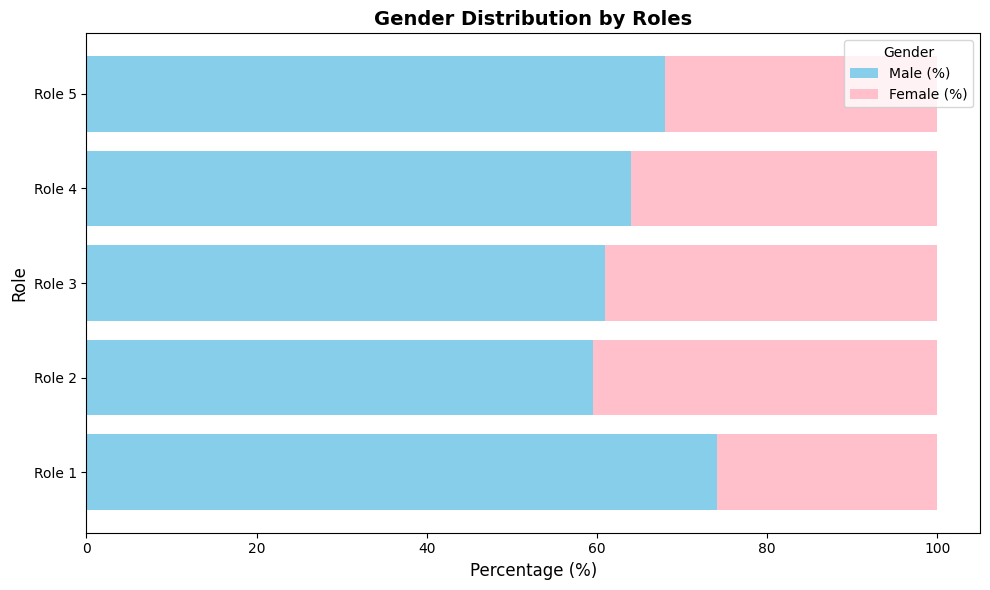

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt


credits = pd.read_csv('rotten_tomatoes_5000_credits.csv')


def get_gender_distribution(actors):
    try:
        actor_list = json.loads(actors)
        gender_distribution = []

        
        for actor in actor_list[:5]:
            gender = actor.get('gender', None)  
            if gender == 1:
                gender_distribution.append(('Female', 100))
            elif gender == 2:
                gender_distribution.append(('Male', 100))
            else:
                gender_distribution.append(('Unknown', 0))

        while len(gender_distribution) < 5:
            gender_distribution.append(('Unknown', 0))

        return gender_distribution
    except Exception as e:
        print(f"Error processing actors: {e}")
        return [('Unknown', 0)] * 5


gender_distributions = credits['rt_actors'].apply(lambda x: get_gender_distribution(x))


for i in range(5):
    credits[f'Role_{i+1}_Gender'] = [dist[i][0] for dist in gender_distributions]
    credits[f'Role_{i+1}_Percentage'] = [dist[i][1] for dist in gender_distributions]


role_gender_counts = {'Male': [0] * 5, 'Female': [0] * 5, 'Unknown': [0] * 5}
for dist in gender_distributions:
    for i in range(5):
        if dist[i][0] == 'Male':
            role_gender_counts['Male'][i] += 1
        elif dist[i][0] == 'Female':
            role_gender_counts['Female'][i] += 1
        else:
            role_gender_counts['Unknown'][i] += 1

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØÿ±ÿµÿØ ŸÜŸÇÿ¥‚ÄåŸáÿß
def calculate_role_percentages(gender_counts):
    role_percentages = {'Male': [], 'Female': []}
    for i in range(5):
        total = gender_counts['Male'][i] + gender_counts['Female'][i]
        if total == 0:
            male_percentage, female_percentage = 0, 0
        else:
            male_percentage = (gender_counts['Male'][i] / total) * 100
            female_percentage = (gender_counts['Female'][i] / total) * 100

        role_percentages['Male'].append(male_percentage)
        role_percentages['Female'].append(female_percentage)

    return role_percentages

role_percentages = calculate_role_percentages(role_gender_counts)

# ŸÜŸÖÿß€åÿ¥ ÿØÿ±ÿµÿØŸáÿß
print("Gender Distribution for each Role:")
for i in range(5):
    print(f"Role {i+1}: Male: {role_percentages['Male'][i]}%, Female: {role_percentages['Female'][i]}%")

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
roles = [f"Role {i+1}" for i in range(5)]
plt.figure(figsize=(10, 6))
plt.barh(roles, role_percentages['Male'], color="skyblue", label="Male (%)")
plt.barh(roles, role_percentages['Female'], left=role_percentages['Male'], color="pink", label="Female (%)")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Role", fontsize=12)
plt.title("Gender Distribution by Roles", fontsize=14, fontweight="bold")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


ÿ≥ŸàÿßŸÑ 10 : ŸÖÿ≠ÿ®Ÿàÿ® ÿ™ÿ±€åŸÜ ⁄òÿßŸÜÿ±Ÿáÿß€å ŸÅ€åŸÑŸÖ ÿØÿ± 10 ÿ≥ÿßŸÑ ⁄Øÿ∞ÿ¥ÿ™Ÿá ÿ®Ÿá ⁄ÜŸá ÿ™ÿ±ÿ™€åÿ® ÿ®ŸàÿØŸá ÿßÿ≥ÿ™ÿü(€å⁄©ÿ®ÿßÿ± ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ™ÿπÿØÿßÿØ review Ÿà €å⁄©ÿ®ÿßÿ± ÿ®ÿ±ÿßÿ≥ÿßÿ≥ critics_score ŸÖŸÇÿß€åÿ≥Ÿá ⁄©ŸÜ€åÿØ.)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun


üìå **Top 10 Genres by Review Count (2015-2024):**
          Genre  Total Review Count
      Adventure              154729
         Action              147583
          Drama              108345
Science Fiction              104354
       Thriller               96378
         Comedy               82153
          Crime               42145
        Fantasy               42088
         Family               35220
      Animation               27315

üìå **Top 10 Genres by Critics Score (2015-2024):**
          Genre  Average Critics Score
            War               6.780000
        History               6.620000
      Animation               6.370588
      Adventure               6.263793
        Romance               6.237500
        Fantasy               6.095652
         Family               6.059259
          Drama               6.009774
         Comedy               5.894937
Science Fiction               5.894872


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

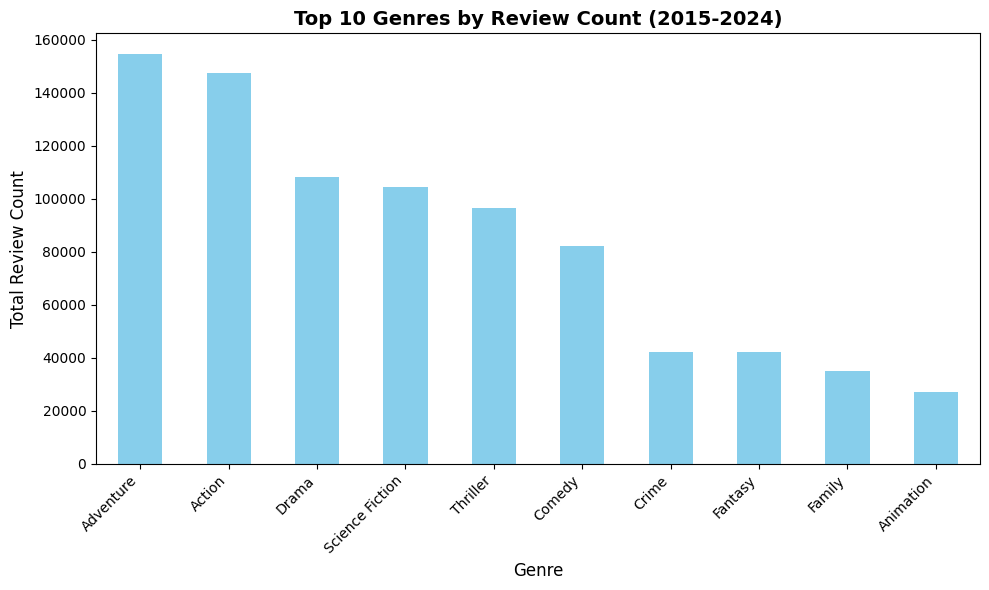

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

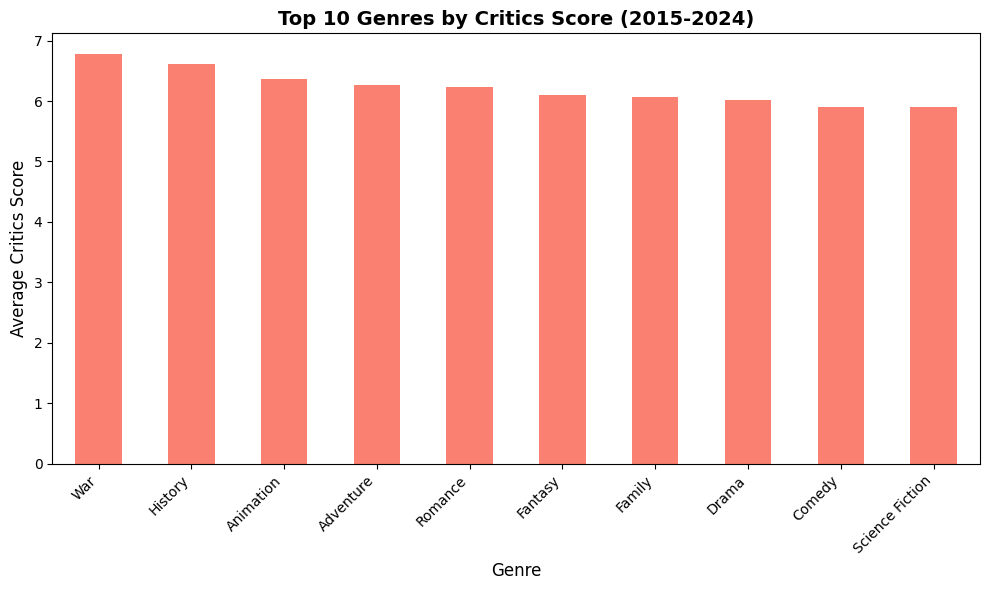

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast


df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')


df_movies["rt_genres"] = df_movies["rt_genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])


recent_movies = df_movies[df_movies["rt_release_date"].dt.year.between(2015, 2024)]


df_exploded = recent_movies.explode("rt_genres")


top_genres_reviews = df_exploded.groupby("rt_genres")["rt_review_count"].sum().sort_values(ascending=False)


top_genres_critics = df_exploded.groupby("rt_genres")["rt_critics_score"].mean().sort_values(ascending=False)


print("\n **Top 10 Genres by Review Count (2015-2024):**")
df_reviews_table = pd.DataFrame({
    "Genre": top_genres_reviews.head(10).index,
    "Total Review Count": top_genres_reviews.head(10).values
})
print(df_reviews_table.to_string(index=False))


print("\n **Top 10 Genres by Critics Score (2015-2024):**")
df_critics_table = pd.DataFrame({
    "Genre": top_genres_critics.head(10).index,
    "Average Critics Score": top_genres_critics.head(10).values
})
print(df_critics_table.to_string(index=False))


plt.figure(figsize=(10, 6))
top_genres_reviews.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres by Review Count (2015-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Total Review Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_genres_critics.head(10).plot(kind="bar", color="salmon")
plt.title("Top 10 Genres by Critics Score (2015-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Critics Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [252]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rt_production_budget     4803 non-null   int64         
 1   rt_genres                4803 non-null   object        
 2   rt_movie_id              4803 non-null   int64         
 3   rt_keywords              4803 non-null   object        
 4   rt_original_language     4803 non-null   object        
 5   rt_original_title        4803 non-null   object        
 6   rt_synopsis              4803 non-null   object        
 7   rt_audience_score        4803 non-null   float64       
 8   rt_studios               4803 non-null   object        
 9   rt_production_countries  4803 non-null   object        
 10  rt_release_date          4802 non-null   datetime64[ns]
 11  rt_box_office            4803 non-null   int64         
 12  rt_runtime               4803 non-

ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å Ÿà ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß

In [ ]:
import pandas as pd
import numpy as np
import ast


df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")
df_credits = pd.read_csv("rotten_tomatoes_5000_credits.csv")

print("Columns in df_movies:", df_movies.columns)
print("Columns in df_credits:", df_credits.columns)


df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')
df_movies["rt_release_year"] = df_movies["rt_release_date"].dt.year


if "rt_genres" in df_movies.columns:
    def parse_json_column(column):
        return column.apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])
    
    df_movies["rt_genres"] = parse_json_column(df_movies["rt_genres"])
else:
    print(" Warning: 'rt_genres' column not found in df_movies!")


if "rt_production_countries" in df_movies.columns:
    df_movies["rt_production_countries"] = parse_json_column(df_movies["rt_production_countries"])
if "rt_languages" in df_movies.columns:
    df_movies["rt_languages"] = parse_json_column(df_movies["rt_languages"])


df_movies["rt_genre_count"] = df_movies["rt_genres"].apply(len) if "rt_genres" in df_movies else 0
df_movies["rt_country_count"] = df_movies["rt_production_countries"].apply(len) if "rt_production_countries" in df_movies else 0
df_movies["rt_language_count"] = df_movies["rt_languages"].apply(len) if "rt_languages" in df_movies else 0


if "rt_actors" in df_credits.columns:
    df_credits["rt_actors_count"] = df_credits["rt_actors"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)
if "rt_staff" in df_credits.columns:
    df_credits["rt_directors_count"] = df_credits["rt_staff"].apply(
        lambda x: sum(1 for person in ast.literal_eval(x) if person["job"] == "Director") if isinstance(x, str) else 0)


df = df_movies.merge(df_credits[["rt_movie_id", "rt_actors_count", "rt_directors_count"]], on="rt_movie_id", how="left")

print(" Data Loaded and Processed")


Columns in df_movies: Index(['rt_production_budget', 'rt_genres', 'rt_website', 'rt_movie_id',
       'rt_keywords', 'rt_original_language', 'rt_original_title',
       'rt_synopsis', 'rt_audience_score', 'rt_studios',
       'rt_production_countries', 'rt_release_date', 'rt_box_office',
       'rt_runtime', 'rt_languages', 'rt_release_status', 'rt_tagline',
       'rt_title', 'rt_critics_score', 'rt_review_count'],
      dtype='object')
Columns in df_credits: Index(['rt_movie_id', 'rt_title', 'rt_actors', 'rt_staff'], dtype='object')
‚úÖ Data Loaded and Processed


In [ ]:
from sklearn.preprocessing import OneHotEncoder


if "rt_genres" in df.columns:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    

    df_exploded = df["rt_genres"].explode()
    
    if df_exploded.isna().sum() > 0:
        print(" Warning: NaN values detected in 'rt_genres' column. Filling NaN values with 'Unknown'.")
        df_exploded = df_exploded.fillna("Unknown")
    
    encoded_genres = encoder.fit_transform(df_exploded.dropna().unique().reshape(-1, 1))
    df_encoded_genres = pd.DataFrame(encoded_genres, columns=encoder.get_feature_names_out(["rt_genres"]))
    df = df.join(df_encoded_genres)
else:
    print(" Warning: 'rt_genres' column not found in df!")


‚ö†Ô∏è Warning: NaN values detected in 'rt_genres' column. Filling NaN values with 'Unknown'.


ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ŸÖÿ¨ŸÖŸàÿπŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df_movies["rt_box_office"]
X = df_movies.drop(columns=["rt_box_office", "rt_movie_id", "rt_title", "rt_original_title"])


scaler = StandardScaler()
numeric_cols = ["rt_production_budget", "rt_runtime", "rt_review_count", "rt_audience_score", "rt_critics_score"]
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print(f" Data split completed! Train shape: {X_train.shape}, Test shape: {X_test.shape}")


‚úÖ Data split completed! Train shape: (3602, 20), Test shape: (1201, 20)


In [ ]:

X_train["rt_release_date"] = pd.to_datetime(X_train["rt_release_date"], errors="coerce")
X_test["rt_release_date"] = pd.to_datetime(X_test["rt_release_date"], errors="coerce")


X_train["rt_release_date"] = X_train["rt_release_date"].dt.year
X_test["rt_release_date"] = X_test["rt_release_date"].dt.year

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(" Data cleaned and ready for training.")


‚úÖ Data cleaned and ready for training.


ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ‚ÄåŸáÿß

In [ ]:
from sklearn.model_selection import train_test_split


target = "rt_box_office"
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print(f" Training Data Shape: {X_train.shape}")
print(f" Test Data Shape: {X_test.shape}")


‚úÖ Training Data Shape: (3602, 46)
‚úÖ Test Data Shape: (1201, 46)


ÿßÿ¨ÿ±ÿß€å ŸÖÿØŸÑ Ÿáÿß€å ÿßŸàŸÑ€åŸá

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])


X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}


df_results = pd.DataFrame(results).T
print("\n Model Performance Comparison:")
print(df_results)


Training Random Forest...
Training XGBoost...

‚úÖ Model Performance Comparison:
                        MAE           MSE  R2 Score
Random Forest  3.887634e+07  7.992457e+15  0.753561
XGBoost        4.009988e+07  9.053377e+15  0.720848


 ÿ™ŸÜÿ∏€åŸÖ Ÿáÿß€åŸæÿ±Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß ÿ®ÿ±ÿß€å XGBoost

In [ ]:
from xgboost import XGBRegressor

best_xgb_params = {
    "n_estimators": 200,
    "learning_rate": 0.1,
    "max_depth": 6,
    "random_state": 42
}

best_xgb = XGBRegressor(**best_xgb_params)
print(" Training XGBoost with best parameters...")
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\n Final XGBoost Model Performance:\nMAE: {mae_xgb}\nMSE: {mse_xgb}\nR2 Score: {r2_xgb}")


üöÄ Training XGBoost with best parameters...

‚úÖ Final XGBoost Model Performance:
MAE: 40267336.0
MSE: 9035677035397120.0
R2 Score: 0.7213940620422363


ŸÜŸÖÿß€åÿ¥ ÿßŸáŸÖ€åÿ™ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

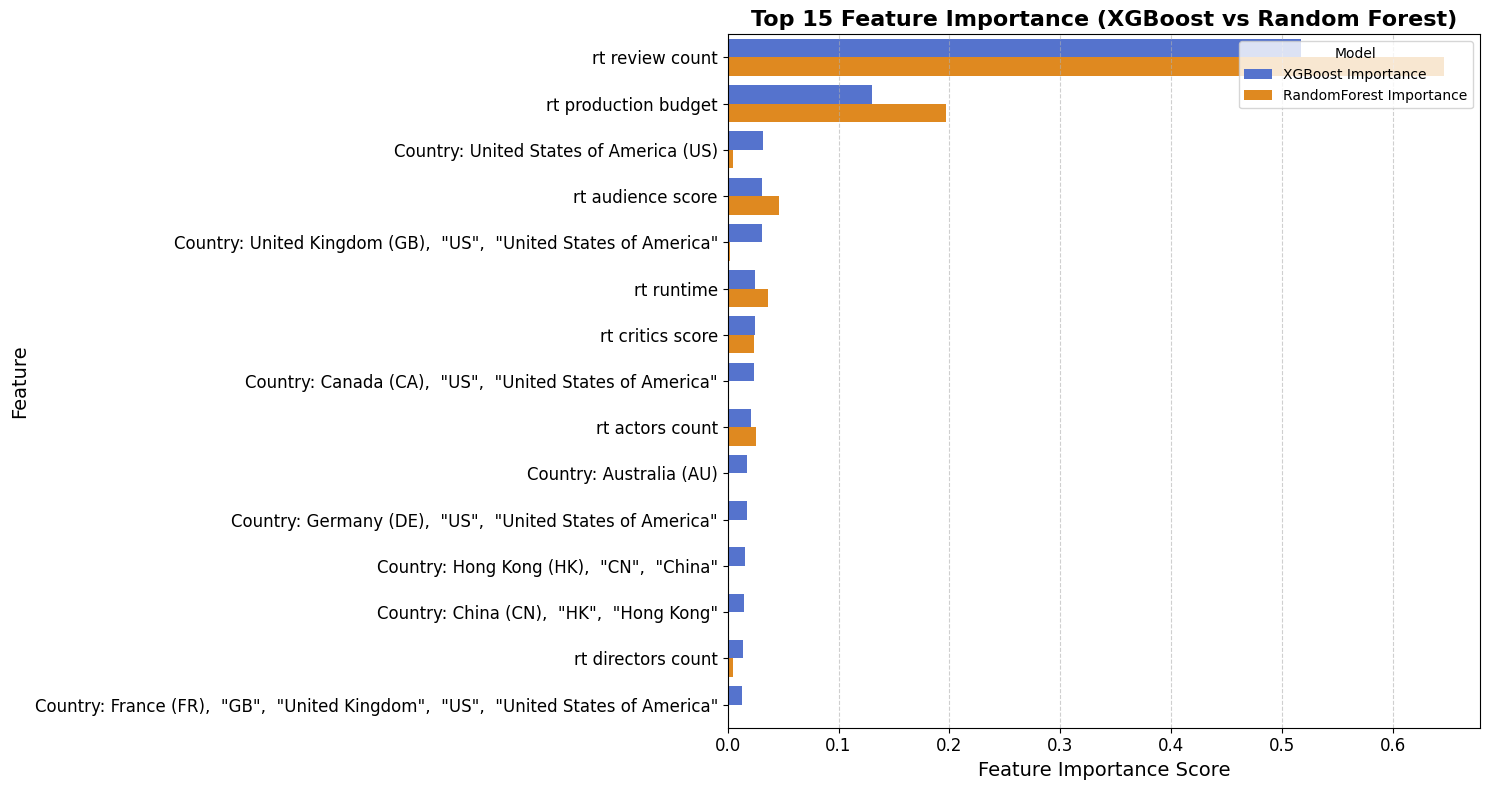


üîπ **Top 15 Features by Importance:**

                                                                           Feature  XGBoost Importance  RandomForest Importance
                                                                   rt review count            0.516552                 0.646070
                                                              rt production budget            0.129888                 0.197156
                                            Country: United States of America (US)            0.032015                 0.004583
                                                                 rt audience score            0.031365                 0.046609
                  Country: United Kingdom (GB),  "US",  "United States of America"            0.031075                 0.002045
                                                                        rt runtime            0.024841                 0.035960
                                                              

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re


def clean_feature_name(feature):
    feature = re.sub(r'Country_{"iso_3166_1":_"([^"]+)",_"name":_"([^"]+)"}', r'\2 (\1)', feature)
    feature = feature.replace('_', ' ')
    feature = feature.replace('{"iso 3166 1":', '').replace('"name":', '').replace('}', '')
    return feature.strip()


feature_importance_df["Feature"] = feature_importance_df["Feature"].apply(clean_feature_name)


feature_importance_df = feature_importance_df.sort_values(by="XGBoost Importance", ascending=False).head(15)


plt.figure(figsize=(15, 8))
sns.barplot(
    data=feature_importance_df.melt(id_vars="Feature", var_name="Model", value_name="Importance"),
    x="Importance", y="Feature", hue="Model",
    palette={"XGBoost Importance": "royalblue", "RandomForest Importance": "darkorange"}
)
plt.title("Top 15 Feature Importance (XGBoost vs Random Forest)", fontsize=16, fontweight="bold")
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.legend(title="Model", loc="upper right")
plt.tight_layout()
plt.show()


print("\n **Top 15 Features by Importance:**\n")
print(feature_importance_df.to_string(index=False))


ŸÖŸÇÿß€åÿ≥Ÿá ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å Ÿà Ÿæ€åÿ¥ ÿ®€åŸÜ€å ÿ¥ÿØŸá 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

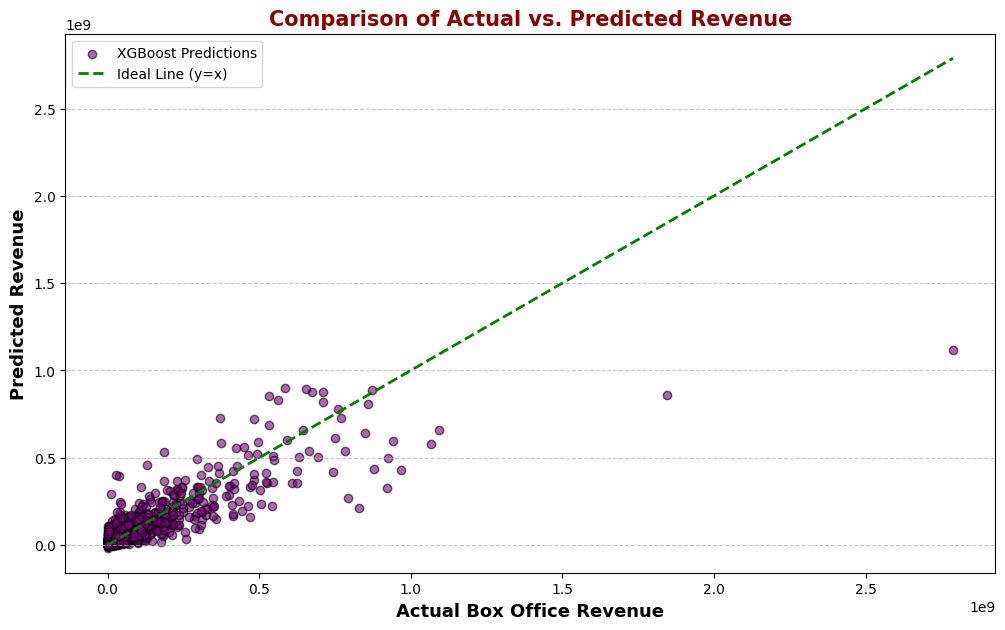

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 7))
plt.scatter(y_test, y_pred_xgb, color='purple', alpha=0.6, edgecolors='black', label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="green", linewidth=2, label="Ideal Line (y=x)")
plt.xlabel("Actual Box Office Revenue", fontsize=13, fontweight="bold")
plt.ylabel("Predicted Revenue", fontsize=13, fontweight="bold")
plt.title("Comparison of Actual vs. Predicted Revenue", fontsize=15, fontweight="bold", color="darkred")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()



In [253]:
df_credit.head()

rt_movie_id                                  rt_title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   

                                           rt_actors  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                            rt_staff  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...